In [ ]:
import numpy as np
import pandas as pd
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
pd.set_option('display.max_columns', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<h1 style="background-color:rgb(60, 60, 60);color:white; text-align: center">Overview</h1>


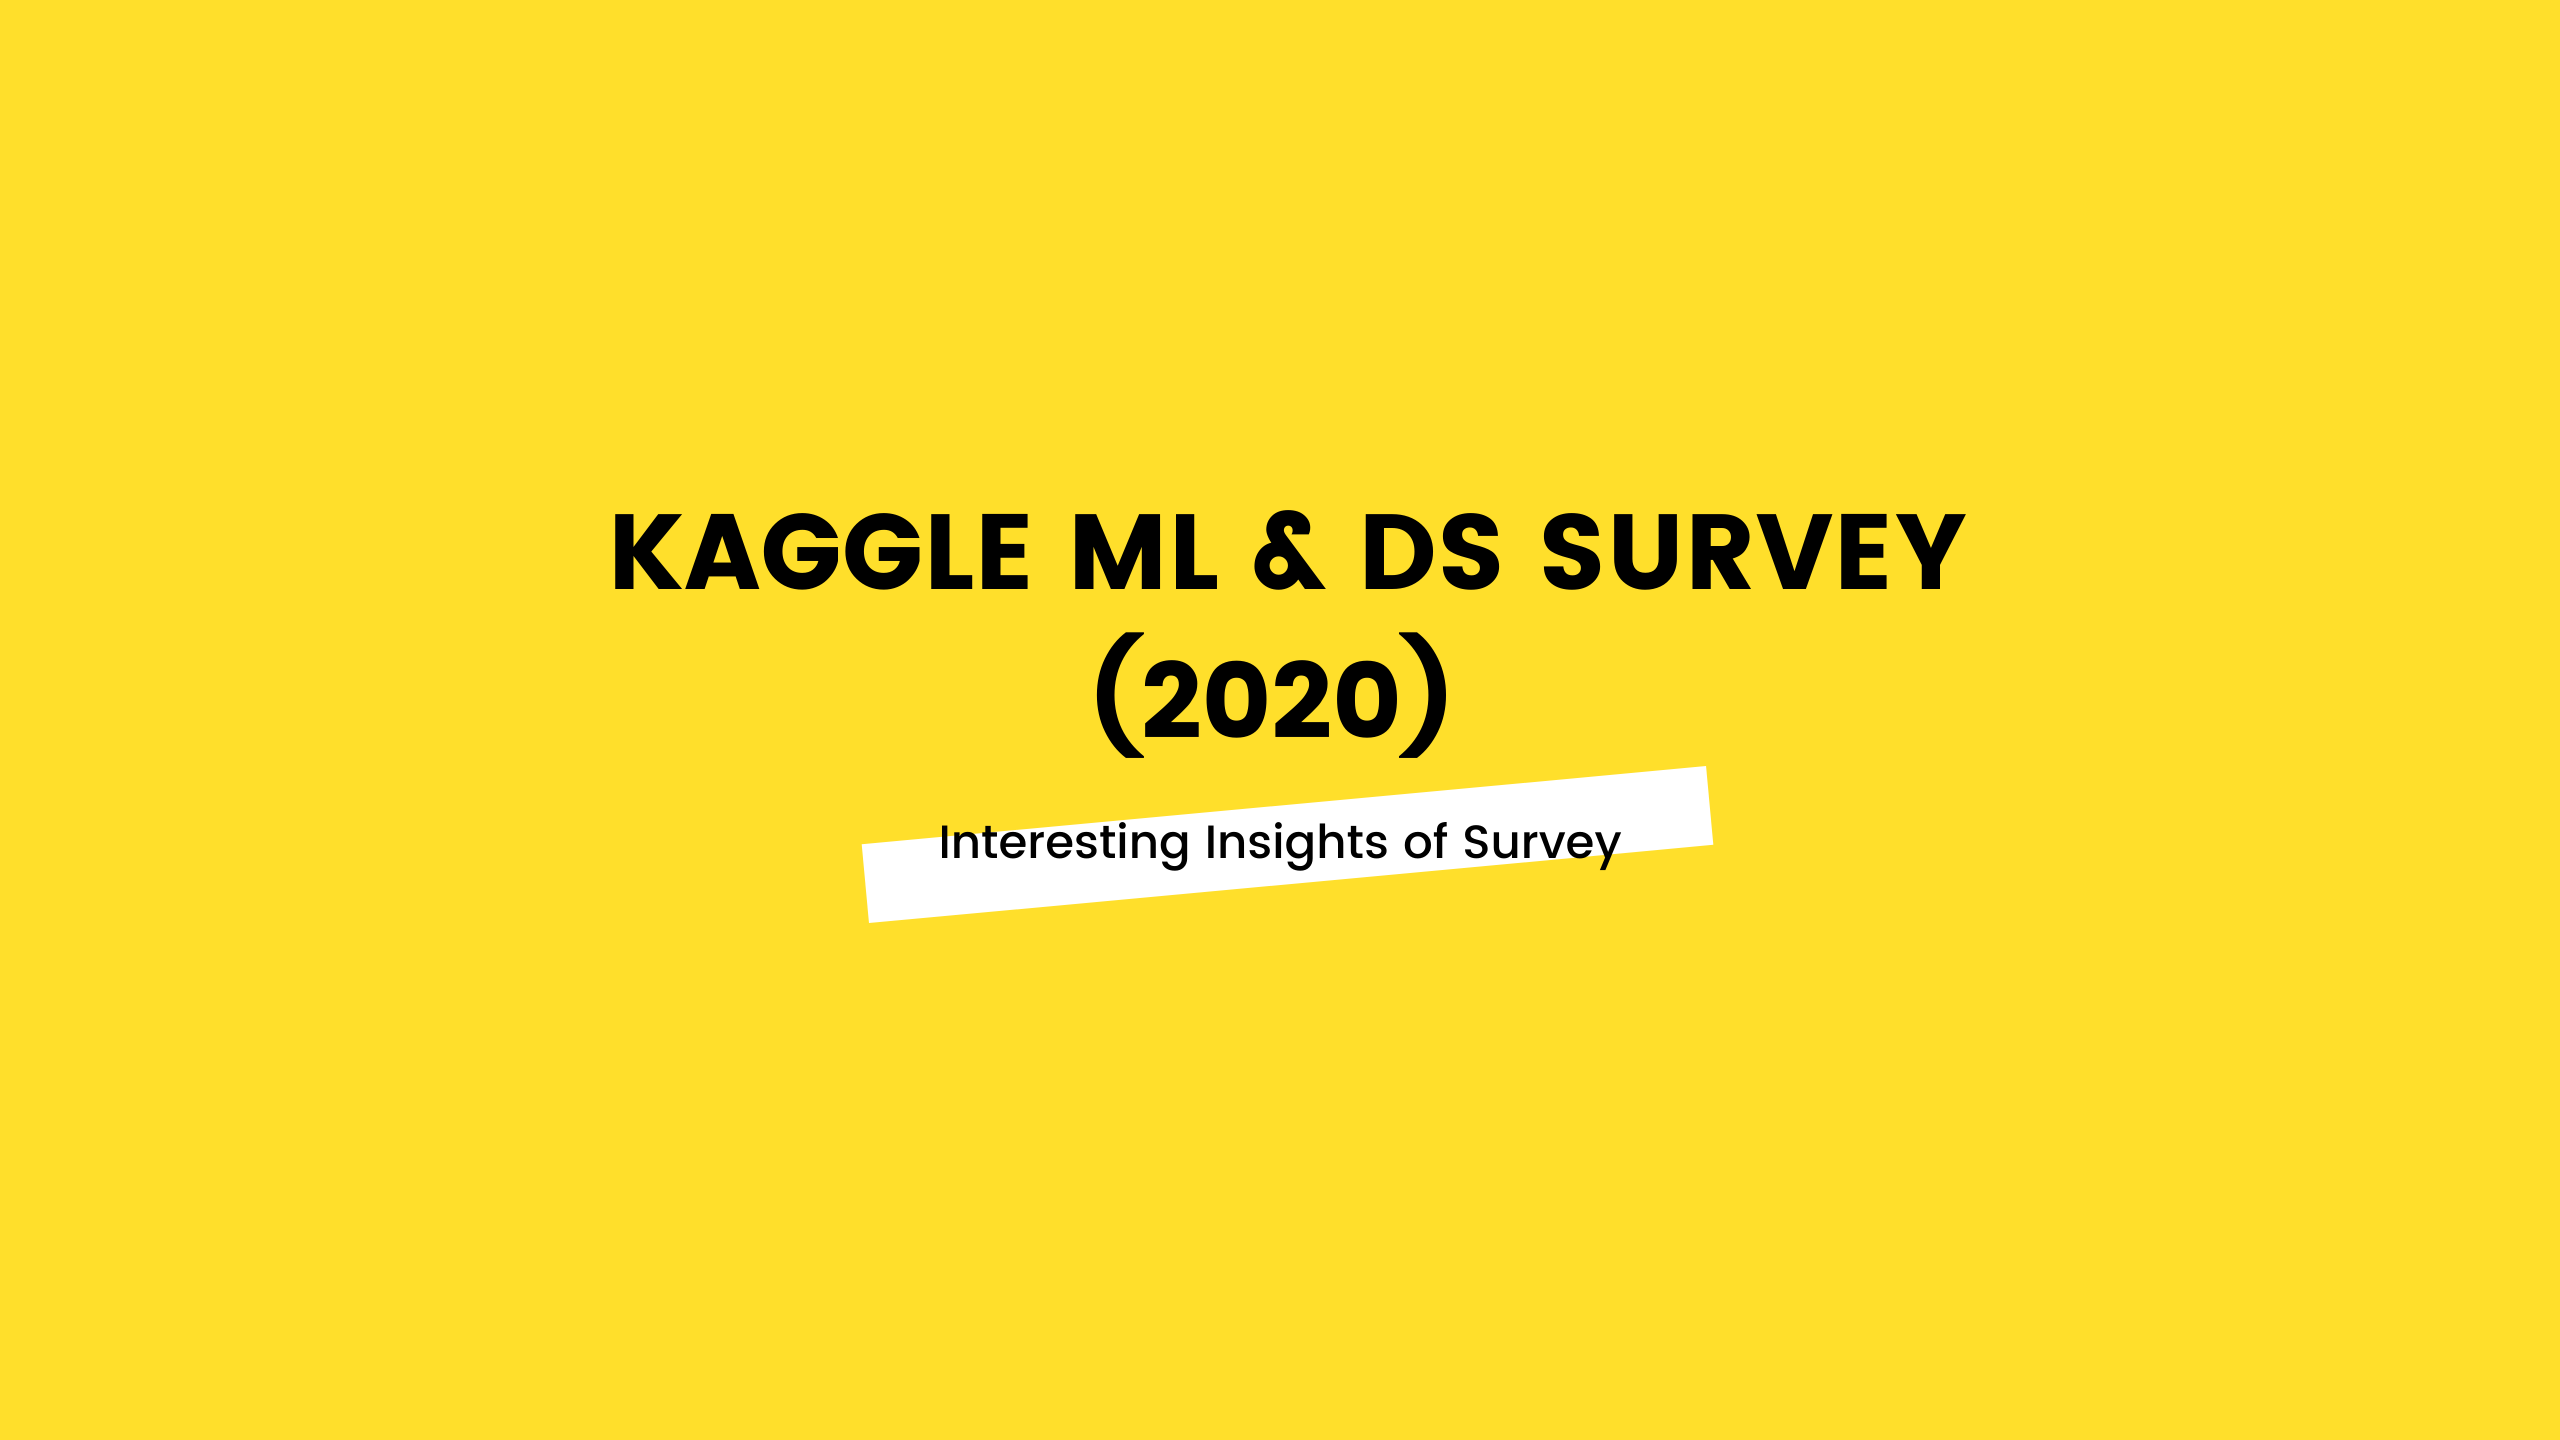


This is Kaggle's annual Machine Learning and Data Science Survey competition for presenting a story of the data science community.The survey was live for 3.5 weeks in October 2020. Below are in detail insights of ML & DS Survey 2020.

---

<h1 style="background-color:rgb(60, 60, 60);color:white; text-align: center">Main Insights</h1>

<br/>
<p style="font-size:18px"><a href="#ins1">1. Profile of People</a></p>
<p style="font-size:18px"><a href="#ins2">2. Education</a></p>
<p style="font-size:18px"><a href="#ins3">3. Experience</a></p>
<p style="font-size:18px"><a href="#ins4">4. Tools, Technology & Languages</a></p>
<p style="font-size:18px"><a href="#ins5">5. Frameworks, Algorithms & Methods</a></p>
<p style="font-size:18px"><a href="#ins6">6. Company & Employment</a></p>
<p style="font-size:18px"><a href="#ins7">7. Conclusion</a></p>

---

In [ ]:
data = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
data

In [ ]:
def mul_col_total(col1,col2,cate_col,color_col,visualize,chart=None,title_of_chart=None,type_of_chart=None):
    #col1: categorical column which displays on axis
    #col2: column for color parameter in fig
    #cate_col: categorical column name which displays on axis
    #color_col: column name for color parameter in fig
    #visualize: Do you want to visualize of want a Transformed DataFrame ('y' or 'n')
    #chart: Bar 'b' or Pie 'c' Chart
    #type_of_chart: Vertical 'v' or Horizontal 'h' Bar Chart
    X_DataFrame = data.loc[1:,:].groupby([col1,col2]).size().reset_index(name='Total')
    X_DataFrame = X_DataFrame.rename(columns={col1:cate_col,col2:color_col})
    X_DataFrame = X_DataFrame.sort_values(by=['Total'],ascending=False)
    X_DataFrame = X_DataFrame.dropna()
    n_col = ((X_DataFrame.groupby([cate_col,color_col]).sum()/X_DataFrame['Total'].sum())*100)
    n_col.index = X_DataFrame.index 
    X_DataFrame['Percentage'] = n_col.reset_index(level=0,drop=True)



    if ((visualize=='Y') or (visualize=='y')):
        if ((chart=='B') or (chart=='b')):
            #Condition for Horizontal or Vertical Bar Chart
            if((type_of_chart=='H') or (type_of_chart=='h')):
                fig = px.bar(X_DataFrame, x='Percentage', y=cate_col, color=color_col, text='Percentage', color_discrete_sequence=px.colors.sequential.Cividis_r, title=title_of_chart)
                fig.update_traces(texttemplate='%{text:.2f}')
                fig.show()

            elif((type_of_chart=='V') or (type_of_chart=='v')):
                fig = px.bar(X_DataFrame, x=cate_col, y='Percentage', color=color_col, text='Percentage', title=title_of_chart)
                fig.update_traces(texttemplate='%{text:.2f}')
                fig.show()
        elif((chart=='c') or (chart=='C'))& ((type_of_chart == None)):
            fig = px.sunburst(X_DataFrame, path=[cate_col, color_col], values='Percentage', color=color_col, color_discrete_sequence=px.colors.sequential.Blugrn_r, title=title_of_chart)
            fig.show()
    elif  (((visualize=='N') or (visualize=='n'))):
        return X_DataFrame


    

    
    
def individual_col_total(col_name,cate_col_name,visualize,chart=None,title_of_chart=None,type_of_chart=None):
    title=dict(Counter(data[col_name][1:]))
    title = pd.DataFrame.from_dict(title, orient='index').reset_index()
    title = title.rename(columns={'index':cate_col_name,0:'Total'})
    title=title.sort_values(by=['Total'],ascending=False)
    title = title.dropna()
    n_col = (title['Total']/title['Total'].sum())*100
    n_col.index = title.index
    title['Percentage'] = n_col
    
    

    if ((visualize=='Y') or (visualize=='y')):
        if ((chart=='B') or (chart=='b')):
            #Condition for Horizontal or Vertical Bar Chart
            if((type_of_chart=='H') or (type_of_chart=='h')):
                fig = px.bar(title, x='Percentage', y=cate_col_name, color=cate_col_name, text='Percentage',color_discrete_sequence=px.colors.sequential.Cividis_r, title=title_of_chart)
                fig.update_traces(texttemplate='%{text:.2f}')
                fig.show()

            elif((type_of_chart=='V') or (type_of_chart=='v')):
                fig = px.bar(title, x=cate_col_name, y='Percentage', color=cate_col_name, text='Percentage', title=title_of_chart)
                fig.update_traces(texttemplate='%{text:.2f}')
                fig.show()
        elif((chart=='c') or (chart=='C'))& ((type_of_chart == None)):
            fig = px.pie(title, values='Total', names=cate_col_name, color_discrete_sequence=px.colors.sequential.Blugrn_r,title=title_of_chart)
            fig.update_traces(textposition='inside', textinfo='percent+label')
            fig.show()
            
    elif  (((visualize=='N') or (visualize=='n'))):
        return title

    
    
    
    
    
    
def combined_total(start_col,end_col,cate_col_name,visualize,chart=None,title=None,type_of_chart=None):
    #Combining 
    X = data.loc[:,start_col:end_col]
    x = data.loc[:,start_col][1:]
    for i in range(1,len(X.columns)):
        x = x.append(X.iloc[:,i][1:])
    
    #Counting and creating DataFrame
    X_DataFrame = dict(Counter(x))
    X_DataFrame = pd.DataFrame.from_dict(X_DataFrame, orient='index').reset_index()
    X_DataFrame = X_DataFrame.rename(columns={'index':cate_col_name,0:'Total'})
    X_DataFrame = X_DataFrame.sort_values(by=['Total'],ascending=False)
    X_DataFrame = X_DataFrame.dropna()
    n_col = (X_DataFrame['Total']/X_DataFrame['Total'].sum())*100
    n_col.index = X_DataFrame.index
    X_DataFrame['Percentage'] = n_col
    
    
    if ((visualize=='Y') or (visualize=='y')):
        if ((chart=='B') or (chart=='b')):
            #Condition for Horizontal or Vertical Bar Chart
            if((type_of_chart=='H') or (type_of_chart=='h')):
                fig = px.bar(X_DataFrame, x='Percentage', y=cate_col_name, color=cate_col_name, text='Percentage',color_discrete_sequence=px.colors.sequential.Cividis_r, title=title)
                fig.update_traces(texttemplate='%{text:.2f}')
                fig.show()

            elif((type_of_chart=='V') or (type_of_chart=='v')):
                fig = px.bar(X_DataFrame, x=cate_col_name, y='Percentage', color=cate_col_name,text='Percentage', title=title)
                fig.update_traces(texttemplate='%{text:.2f}')
                fig.show()

        elif((chart=='c') or (chart=='C'))& ((type_of_chart == None)):
            fig = px.pie(X_DataFrame, values='Total', names=cate_col_name, color_discrete_sequence=px.colors.sequential.Blugrn_r,title=title)
            fig.update_traces(textposition='inside', textinfo='percent+label')
            fig.show()
            

    elif  (((visualize=='N') or (visualize=='n'))):
        return X_DataFrame    


<a id="ins1"></a>
<h1 style="background-color:rgb(60, 60, 60);color:white; text-align: center">Profile of People</h1>

## 1. Age-Group & Gender:
1. In this survey, there are **79%** people are from **Man Category**. It is pretty evident that Highest number of people are from **25-29** years Age Category **(15.6%) Men** and **(4%) Women**. 

2. So, **70%** people are between age **18-34** years and most of them are **Men (54%)**.As far as **Age Group** is concerned, Number of **Man** is highest in **25-29 Years (15.6% of total)** And Number of **Woman** is highest in **22-24 Years (4.42% of total)** of Age-Group.

In [ ]:
individual_col_total('Q1','Gender','y','c','Gender Stats')   #Gender Stats
mul_col_total('Q1','Q2','Age_Group','Gender','y','b','Age-Gender Stats','v')  #Age-Gender Stats
mul_col_total('Q2','Q1','Gender','Age','y','b','Gender-Age Stats','h')  #Gender with Age Stats

## 2. Country Residence:
Around 29% people are from **India** which is highest among other countries.Here, **Highest Age Group** from perticular country **differntiates**, **as country changes**.

Like, **"India"** has highest **18-21 years** old people, **"USA"** has **30-34 years** old and **"China"** has **22-24 years** old people and so on... It is also clear that **Num. of Man Category is higher** in every country than Woman who are interested or in field of Data Science.

In [ ]:
mul_col_total('Q3','Q2','Country','Gender','y','b','Country-Gender Stats','h')
mul_col_total('Q3','Q1','Country','Age','y','b','Country-Age Stats','h')
individual_col_total('Q3','Country','y','c','Country Stats')

---

<a id="ins2"></a>
<h1 style="background-color:rgb(60, 60, 60);color:white; text-align: center">Education</h1>


## 1. Higher Education:
Here, It is clear that highest degree of education has been done among people is **"Master's Degree" (40.2%)** and **"Bachelor's Degree" (35.7%)**. Among 79% Men, **31.3%** have done **"Master's Degree"** and **28.6%** have done **"Bachelor's Degree"**. It seems that as the age of people increases more number of people increases for **Master's Degree**, number of people who have done Master's Increases and from age 25, Master's Degree is highest in every Age category .

Here, It seems that people have acquired or are interested in doing Master's Degree than other Education Degree. It could be possible that they want to concritised their qualification by doing Master's Degree in Data Science or maybe they have done Master's in other field and are working professionals who wants to make a transition to data science as Data Science is booming from past few years. This could be only reason why there are more people interested in doing or have done Master's Degree than Bachelor's Degree. 

In [ ]:
individual_col_total('Q4','Education','y','c','Education Stats')
mul_col_total('Q2','Q4','Gender','Education','y','b','Education-Gender Stats','v')
mul_col_total('Q1','Q4','Age','Education','y','b','Education-Age Stats','h')

## 2. Platform for Courses :
Around **21%** people did their course on **"Coursera"**, followed by **14%** people on **"Kaggle Learn Courses"** and around **13%** on **"Udemy"**.

In [ ]:
combined_total('Q37_Part_1','Q37_OTHER','Course Platform','y','c','Course Completion Stats')

## 3. Media Sources:
**"Kaggle (21%)"**, **"YouTube(18%)"** and **"Blogs(17%)"** are most favourite sources among people for Knowledge.

In [ ]:
media = combined_total('Q39_Part_1','Q39_OTHER','Media Source','n')
fig = px.pie(media, values='Percentage', names='Media Source', color_discrete_sequence=px.colors.sequential.Blugrn_r,title='Media Sources stats')
fig.show()

---

<a id="ins3"></a>
<h1 style="background-color:rgb(60, 60, 60);color:white; text-align: center">Experience</h1>


## 1. Coding Experience:
1. In **Man Category**, **3-5 years (18.7%)** experience is highest. Whereas, In **Woman Category**, **1-2 years (5.3%)** experience is highest.


2. People in 25-29 Age Category have highest number of experienced people. It is also clear as Age increases category of years experience also started to shift from **18-21** to **70+** Years.


3. **Degree - Highest Conding Exp Category:**
    1. **Bachelore's Degree:** 1-2 Years (10.9% of 35.7%)
    2. **Master's Degree:** 3-5 Years (10.7% of 40.2%)
    3. **In college/university:** 1-2 Years
    4. **Doctoral Degree:** 5-10 Years


4. **Related Job Title - Highest Category of Coding Exp:**
    1. **Student:** 1-2 Years (9.5% of 26%)
    2. **Data Scientist:** 3-5 Years (3.8% of 14%)
    3. **Data Analyst:** 1-2 Years
    4. **Currently Not Employed:** <1 Years
    5. **Software Engineer:** 3-5 Years
    6. **ML Engineer:** 3-5 Years
    7. **BA:** <1 years
    8. **Research Scientist:** 5-10 Years
    9. **Project Manager:** 10-20 Years


In [ ]:
mul_col_total('Q2','Q6','Gender','Coding Exp','y','b','Coding Exp-Gender Stats','h')
mul_col_total('Q1','Q6','Age','Coding Exp','y','b','Coding Exp-Age Stats','h')
mul_col_total('Q4','Q6','Degree','Coding Exp','y','b','Coding Exp-Degree Stats','v')
mul_col_total('Q5','Q6','Related Job','Coding Exp','y','b','Coding Exp-Job Stats','v')

## 2. Machine Learning Experience:
In every Degree of Education, highest number of people have **<1 year** of experience whether it is Doctoral or Master's Degree. Except **Data Scientist (3.3%)**, **Data Engineer (0.74%)** and **ML Engineer (1.7%)** **(1-2 years)**, every category in related job has highest **<1 year** of  ML experienced people.

In [ ]:
mul_col_total('Q4','Q15','Degree','ML Usage','y','b','ML Experience- Degree Stats','v')
mul_col_total('Q5','Q15','Related Job','ML Usage','y','b','ML Experience-Related Job Stats','h')

---

<a id="ins4"></a>
<h1 style="background-color:rgb(60, 60, 60);color:white; text-align: center">Tools, Technology & Languages</h1>


## Languages:
### 1. Programming Languages:
1. **33%** usage of **"Python"** on regular basis followed by **16%** **"SQL"** and **9%** **"R"**.
2. Around **80%** people recommended **"Python"** for getting started with Data Science followed be **7%** for **"R"**.
3. Here, we can see that **"Python"** was mostly recommended by **"Students" (22% of 80%)** followed by **"Data Scientist" (11.7% of 80%)**.

In [ ]:
combined_total('Q7_Part_1','Q7_OTHER','Languages','y','c','Language Used Regularly Stats')
individual_col_total('Q8','Languages','y','b','Language Recommended Stats','v')
mul_col_total('Q8','Q5','Recommended Languages','Related Job Title','y','b','Recommended Languages-Related Job Stats','h')

### 2. Visualization Libraries:
Mostly used Visualization Library is **"Matplotlib" (34%)** times voted followed by **"Seaborn" (24%)** and **"Plotly" (11%)**.

In [ ]:
combined_total('Q14_Part_1','Q14_OTHER','Libraries','y','c','Visualization Libraries Stats',)

## Tools:
### 1. IDE Usage:
**"Jupyter" (26.7%)** voted, is most used IDE followed by **"VSCode" (13.9%)** & **"PyCharm"(12.14%)** among survey participants.

In [ ]:
combined_total('Q9_Part_1','Q9_OTHER','IDE','y','b','IDE Usage Stats','H')

### 2. Business Intelligence Tools:
Mostly Used by **Professionals**: **"Tableau" (36%)** followed by **"Microsoft Power BI" (30.8%)**.

Most Familiarity Predicted by **Non-Professionals**: **"Tableau"(22.2%)** followed by **"Microsoft Power BI" (18.7%)** and **"Google Data Studio" (15.3%)**. 

**Tableau** and **PowerBI** are mostly used by **Data Scientist** followed by **Data Analyst**.

In [ ]:
individual_col_total('Q32','Tool','y','b','Business Intelligence Tools Used Stats (By Professionals)','v')
combined_total('Q31_B_Part_1','Q31_B_OTHER','BI Tools','y','b','Familiar BI Tool in future Stats (By Non-Professionals)','v')
mul_col_total('Q32','Q5','BI Tools','Related Job','y','b','BI Tools Stats','h')

### 3. Automated ML Tools:
Mostly Used by **Professionals**: **"None" (20.2%)** followed by **"Auto-Sklearn" (18.3%)**

Most Familiarity Predicted by **Non-Professionals**: **"Auto-Sklearn" (19.8%)**

In [ ]:
combined_total('Q34_A_Part_1','Q34_A_OTHER','Automated Tool','y','b','Automated ML Tools Stats (By Professionals)','h')
combined_total('Q34_B_Part_1','Q34_B_OTHER','Tools','y','b','Familiar Automated ML Tools Stats (By Non-Professionals)','h')

### 4. Management Tools For ML:
Mostly Used by **Professionals**: **"None" (64.2%)** followed by **"TensorBoard" (18%)**

Most Familiarity Predicted by **Non-Professionals**: **"TensorBoard" (26.7%)**

In [ ]:
combined_total('Q35_A_Part_1','Q35_A_OTHER','Tools','y','c','Management Tools Usage Stats (By Professionals)')
combined_total('Q35_B_Part_1','Q35_B_OTHER','Tools','y','c','Managing ML Experience Tools Stats (Non-Professionals)')

### 5. Primary Tool:
Mostly used primary tool is **"Local Development Environments" (46%)** followed by **"Basic Statistical Software" (31.7%)**. Out of 46% Users **10.4%** users are **"Data Scientist"** followed by **"Students" (10%)**.

In [ ]:
individual_col_total('Q38','Tools','y','b','Primary Tool Usage Stats','v')
mul_col_total('Q38','Q5','Primary Tool','Related Job','y','b','Primary Tool usage by Job Title Stats','v')

## Technology:
### 1. NoteBook Product:
**"Colab Notebook" (24.6%)** is mostly used product on regular basis followed by **"Kaggle Notebook" (23.3%)**.

In [ ]:
combined_total('Q10_Part_1','Q10_OTHER','Notebook Product','y','b','NoteBook Products Usage Stats','V')

### 2. Computing Platform:
It is clear that most of the people prefer to use **"Personal Computer or Laptop" (78.4%)** followed by **"Cloud Computing Platform" (14%)** as Computing Platforms.

In [ ]:
individual_col_total('Q11','Computing Platform','y','c','Computing Platform Stats')

### 3. Cloud Computing Platform:
Mostly Used by **Professionals**: **"AWS" (26.9%)** followed by **"Google Cloud Platform" (21.9%)**

Most Familiarity Predicted by **Non-Professionals**: **"AWS" (25.3%)** followed by **"Google Cloud Platform" (24.9%)**

In [ ]:
combined_total('Q26_A_Part_1','Q26_A_OTHER','Cloud Platform','y','b','Cloud Computing Platform regularly Used Stats (By Professional)','v')
combined_total('Q26_B_Part_1','Q26_B_OTHER','Cloud Platform','y','b','Familiar Cloud Computing Platform in future Stats (By Non-Professional)','v')

### 4. Cloud Computing Products:
Mostly Used by **Professionals**: **"Amazon EC2" (18.6%)**.

Most Familiarity Predicted by **Non-Professionals**: **"Google Cloud Compute Engine" (13.5%)** followed by **"Google Cloud Functions" (11%)**

In [ ]:
combined_total('Q27_A_Part_1','Q27_A_OTHER','Product','y','b','Regular Usage of Cloud Computing Products Stats (By Professional)','h')
combined_total('Q27_B_Part_1','Q27_B_OTHER','Products','y','b','Familiar Cloud Computing Products in Future Stats (By Non-Professional)','h')

### 5. ML Products:
Mostly Used by **Professionals**: **"None" (40.6%)**.

Most Familiarity Predicted by **Non-Professionals**: **"Google Cloud AI Platform" (16.2%)**.

In [ ]:
combined_total('Q28_A_Part_1','Q28_A_OTHER','Product','y','c','ML Product usage Stats (By Professionals)')
combined_total('Q28_B_Part_1','Q28_B_OTHER','Products','y','c','Familiar ML Product in future Stats (By Non-Professionals)')

### 6. Big Data Products:
Mostly Used by **Professionals**: **"MySQL" (21.7%)** followed by **"PostgresSQL" (14.8%)** & **"Microsoft SQL Server" (14.6%)**.

Most Familiarity Predicted by **Non-Professionals**: **"MySQL" (14.9%)** followed by **"MongoDB" (11.1%)**.

Here, Most of the Big Data Products are highly used by **Data Scientist**.

In [ ]:
individual_col_total('Q30','Product','y','b','Big Data Product usage Stats (By Professionals)','v')
combined_total('Q29_B_Part_1','Q29_B_OTHER','Product','y','b','Familiar Big Data Product in Future Stats (By Non-Professionals)','v')
mul_col_total('Q30','Q5','Product','Related Job','y','b','Big Data Product usage by Job title stats','h')

### 7. Deployment of Data Analysis or Machine Learning Applications Platform:
Here, Most used Platform for showcasing the work, is **"GitHub" (32.8%)**, among people involved in survey.

In [ ]:
combined_total('Q36_Part_1','Q36_OTHER','Platform','y','b','Platform Stats','v')

### 8. Specialized Hardware:
In Specialized Hardware, most of the people prefer to use **"GPU" (46.6%)** or **"Nothing" (44.3%)**. And around **72%** people Never used **"TPU"**.

In [ ]:
combined_total('Q12_Part_1','Q12_OTHER','Hardware','y','b','Specialized Hardware Stats','h')
individual_col_total('Q13','TPU Usage','y','c','TPU Usage Stats')
mul_col_total('Q13','Q5','TPU','Related Job','y','b','TPU usage by Job title stats','h')

---

<a id="ins5"></a>
<h1 style="background-color:rgb(60, 60, 60);color:white; text-align: center">Frameworks, Algorithms & Methods</h1>


## ML Framework:
Highly voted for Usage ML Frameworks are **"Scikit-learn" (26%)**, **"TensorFlow" (17.7%)** and **"Keras" (15.8%)**.

In [ ]:
combined_total('Q16_Part_1','Q16_OTHER','ML Framework','y','c','ML Framework Usage')


## ML Algorithms:
Here, It is clear that mostly voted for regular usage ML Algorithm is **"Linear or Logistic Regression" (22.44%)**. 

In [ ]:
ml = combined_total('Q17_Part_1','Q17_OTHER','ML Algorithms','n')
fig = px.pie(ml, values='Percentage', names='ML Algorithms', color_discrete_sequence=px.colors.sequential.Blugrn_r,title='ML Algorithms Stats')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-1.5,
    xanchor="right",
    x=1
))
fig.show()

## Methods:
### 1. Computer Vision Methods:
In Computer Vision Methods, people most commonly used **"Image Classification Networks" (29.14%)** like VGG, ResNet etc. Followed by **"General Purpose" (17.7%)** and **"Object Detection" (17.2%)** methods.

In [ ]:
cv = combined_total('Q18_Part_1','Q18_OTHER','Computer Vision Methods','n')
fig = px.pie(cv, values='Percentage', names='Computer Vision Methods', color_discrete_sequence=px.colors.sequential.Blugrn_r,title='Computer Vision Methods Stats')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.7,
    xanchor="right",
    x=1
))
fig.show()

### 2. NLP Methods: 
Highly voted NLP Methods for regular usage are **"Word Embeddings" (31.3%)**, **"Encoder-Decoder Models" (22.5%)** and **"Transformer Language Models" (21.2%)**. 

In [ ]:
combined_total('Q19_Part_1','Q19_OTHER','NLP Methods','y','b','NLP Methods Usage Stats','v')

---

<a id="ins6"></a>
<h1 style="background-color:rgb(60, 60, 60);color:white; text-align: center">Company & Employment</h1>


## 1. Size of Companies:
Among employed people, **36.9%** people works at **0-49 employees** sized company. Whereas, around **20%** people works at **10,000** employees sized company and **17%** people at **1000-9,999 employees** sized company.

In [ ]:
individual_col_total('Q20','Company Size','y','b','Size of company Stats','h')

## 2. Number of People responsible for DS at Company:
In surveyed people, Around **46%** people are from those companies who has **"1-2" (23.4%)** or **"0" (20.3%)** people responsible for Data Science work. But, There are **20%** people from companies where there are **20+** people responsible for Data Science Work. Also it is clears that no of people working at company does not depend on size of company it depends on company's working area. 

In [ ]:
individual_col_total('Q21','No. of Responsible People','y','b','Responsible People Stats','v')
mul_col_total('Q21','Q20','Res. People','Company Size','y','b','Res. People - Company Size Stats','h')

## 3. ML Incorporation:
In terms of incorporating Machine Learning in company, around **40%** people are from those companies where **either they do not use ML (20%) or they are exploring ML methods (21%)**. So, we can say that considerable amount of the company are at initial stage.

Whereas, There are around **45%** people who are from companies where **ML incorporation has already happended**, they are using ML methods in some way or another.

In [ ]:
ml_in = individual_col_total('Q22','ML Incorporation','n')
fig = px.pie(ml_in, values='Total', names='ML Incorporation', color_discrete_sequence=px.colors.sequential.Blugrn_r, title='ML Incorporation in Companies Stats')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.7,
    xanchor="right",
    x=1
))
fig.show()

## 4. Important Activities at Work:
Here, It is clear that **"Analyzing and Understanding Data for Product & Business Decisions" (26.5%)** is most common important activity at work.

In [ ]:
act = combined_total('Q23_Part_1','Q23_OTHER','Activity','n')
fig = px.pie(act, values='Total', names='Activity', color_discrete_sequence=px.colors.sequential.Blugrn_r, title='Important Activities at Work Stats')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.7,
    xanchor="right",
    x=1
))
fig.show()

## 5. Compensation:
Here, it is pretty clear that **highest category of compensation** that people in survey receive is **(19.8%) 0-999$**. According to data, **"if a person is working as a Data Scientist then he/she is more likely to have higher compensation"**. Additionally, **"Most people from America have more than **70,000+  (Higher Range of Compensation)** compensation as compare to India (Most <70,000)".

In [ ]:
individual_col_total('Q24','Compensation','y','b','Compensation Stats','v')
mul_col_total('Q24','Q3','Compensation','Country','y','b','Compensation-Country Stats','h')
mul_col_total('Q5','Q24','Compensation','Related Job','y','b','Compensation-Related Job Stats','h')

## 6. Related Job Title:
1. Man & Woman Gender Category have highest category **Student (19.9% & 6.4%)** followed by **Data Scientist (11.4% & 2.3%)** as a Related Job Title.
2. Initially, **Students** Category is **Higher** than Other Category. But, **As Age increases** Number of **Data Scientist** Category as a Job title increases among surveyed people.
3. As value of Educational Degree of people increases, more and more people tend to work as more responsible job titles like **Data Scientist**, **ML Engineer**, **Research Scientist**. 

In [ ]:
mul_col_total('Q2','Q5','Gender','Related Job','y','b','Related Job-Gender Stats','h')
mul_col_total('Q1','Q5','Age','Related Job','y','b','Related Job-Age Stats','h')
mul_col_total('Q4','Q5','Education','Related Job','y','b','Related Job-Education Stats','v')

---

<a id="ins7"></a>
<h1 style="background-color:rgb(60, 60, 60);color:white; text-align: center">Conclusion</h1>

<h2 style="background-color:rgb(100, 100, 100);color:white; text-align: center">Profile of People</h2>

### Age-Group & Country:
1. In survey, there are **78.8%** people are **"Male"** and **19.4%** people are **"Female"**.
2. People from **25-29** years Age category **(20%)** are highest in survey.
3. **70%** people are between age **18-34** years.
4. Around **29%** people are from India which is highest among other countries.
5. Here, **Highest Age Group** from perticular country **differntiates**, **as country changes**.

<h2 style="background-color:rgb(100, 100, 100);color:white; text-align: center">Education</h2>

### Higher Education, Course Platform & Media Sources:
1. Number of people for **"Master's Degree" (40.2%)** and **"Bachelor's Degree" (35.7%)** are highest in Educational Degree.
2. **21%** people did their course on **"Coursera"**, followed by **14%** people on **"Kaggle Learn Courses"** and around **13%** on **"Udemy"**.
3. **"Kaggle"**, **"YouTube"** and **"Blogs"** are most favourite sources among people for Knowledge. 

<h2 style="background-color:rgb(100, 100, 100);color:white; text-align: center">Experience</h2>

### Coding & Machine Learning Experience:
1. In **Man Category**, **3-5 years (18.7%)** experience is highest. Whereas, In **Woman Category**, **1-2 years (5.3%)** experience is highest

2. **1-2 Years (10.9% of 35.7%)** coding experience, is highest among people who have done **Bachelore's Degree**, and **3-5 Years (10.7% of 40.2%)** in **Master's Degree**.

3. **1-2 Years (9.5% of 26%)** coding experience, is highest among who are **Student**, and **3-5 Years (3.8% of 14%)** as **Data Scientist**.


<h2 style="background-color:rgb(100, 100, 100);color:white; text-align: center">Tools, Technology & Languages</h2>

### Languages:

1. **"Python"** is mostly used **(33%)** & recommended **(80%)** language. **"Python"** was mostly recommended by **"Students" (22% of 80%)** followed by **"Data Scientist" (11.7% of 80%)**. Mostly used Visualization Library is **"Matplotlib" (34%)** times voted.
2. **"Jupyter" (26.7%)** voted, is most used IDE.

### Tools:
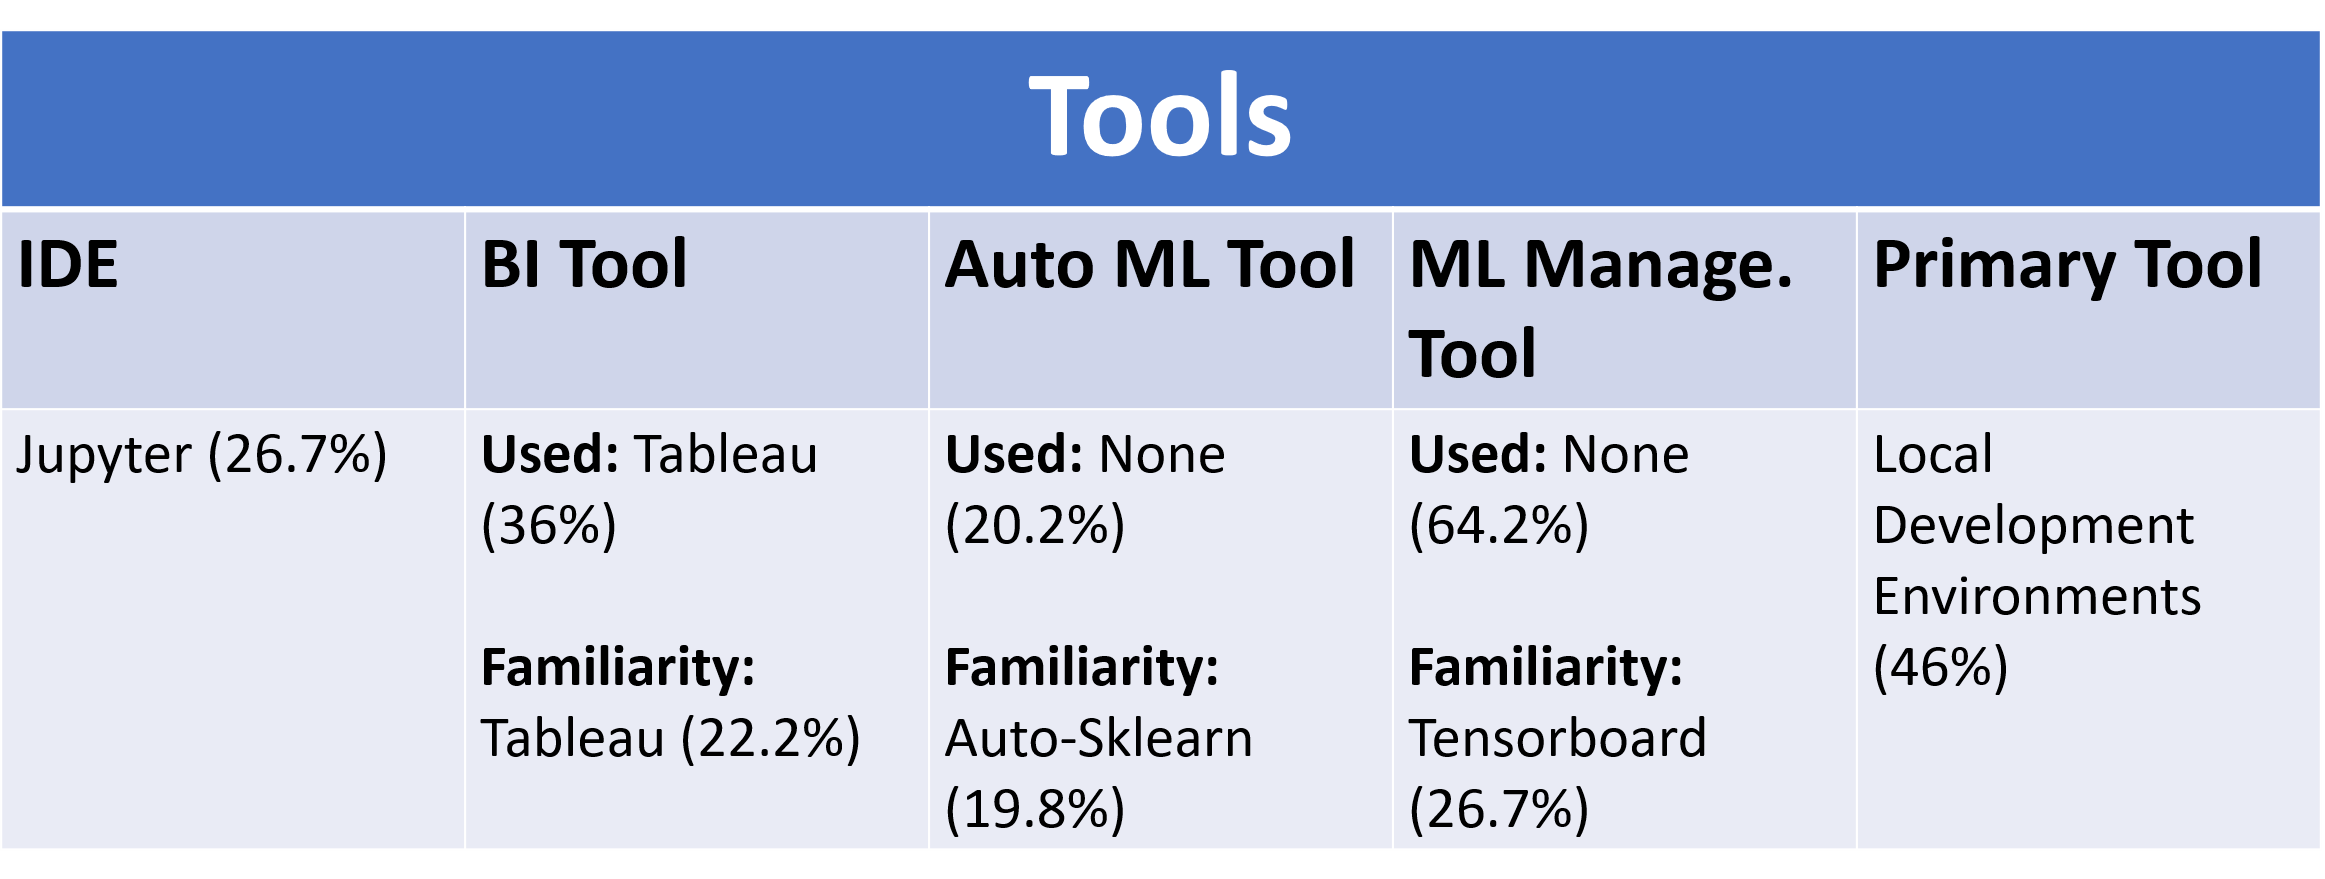


### Technology:
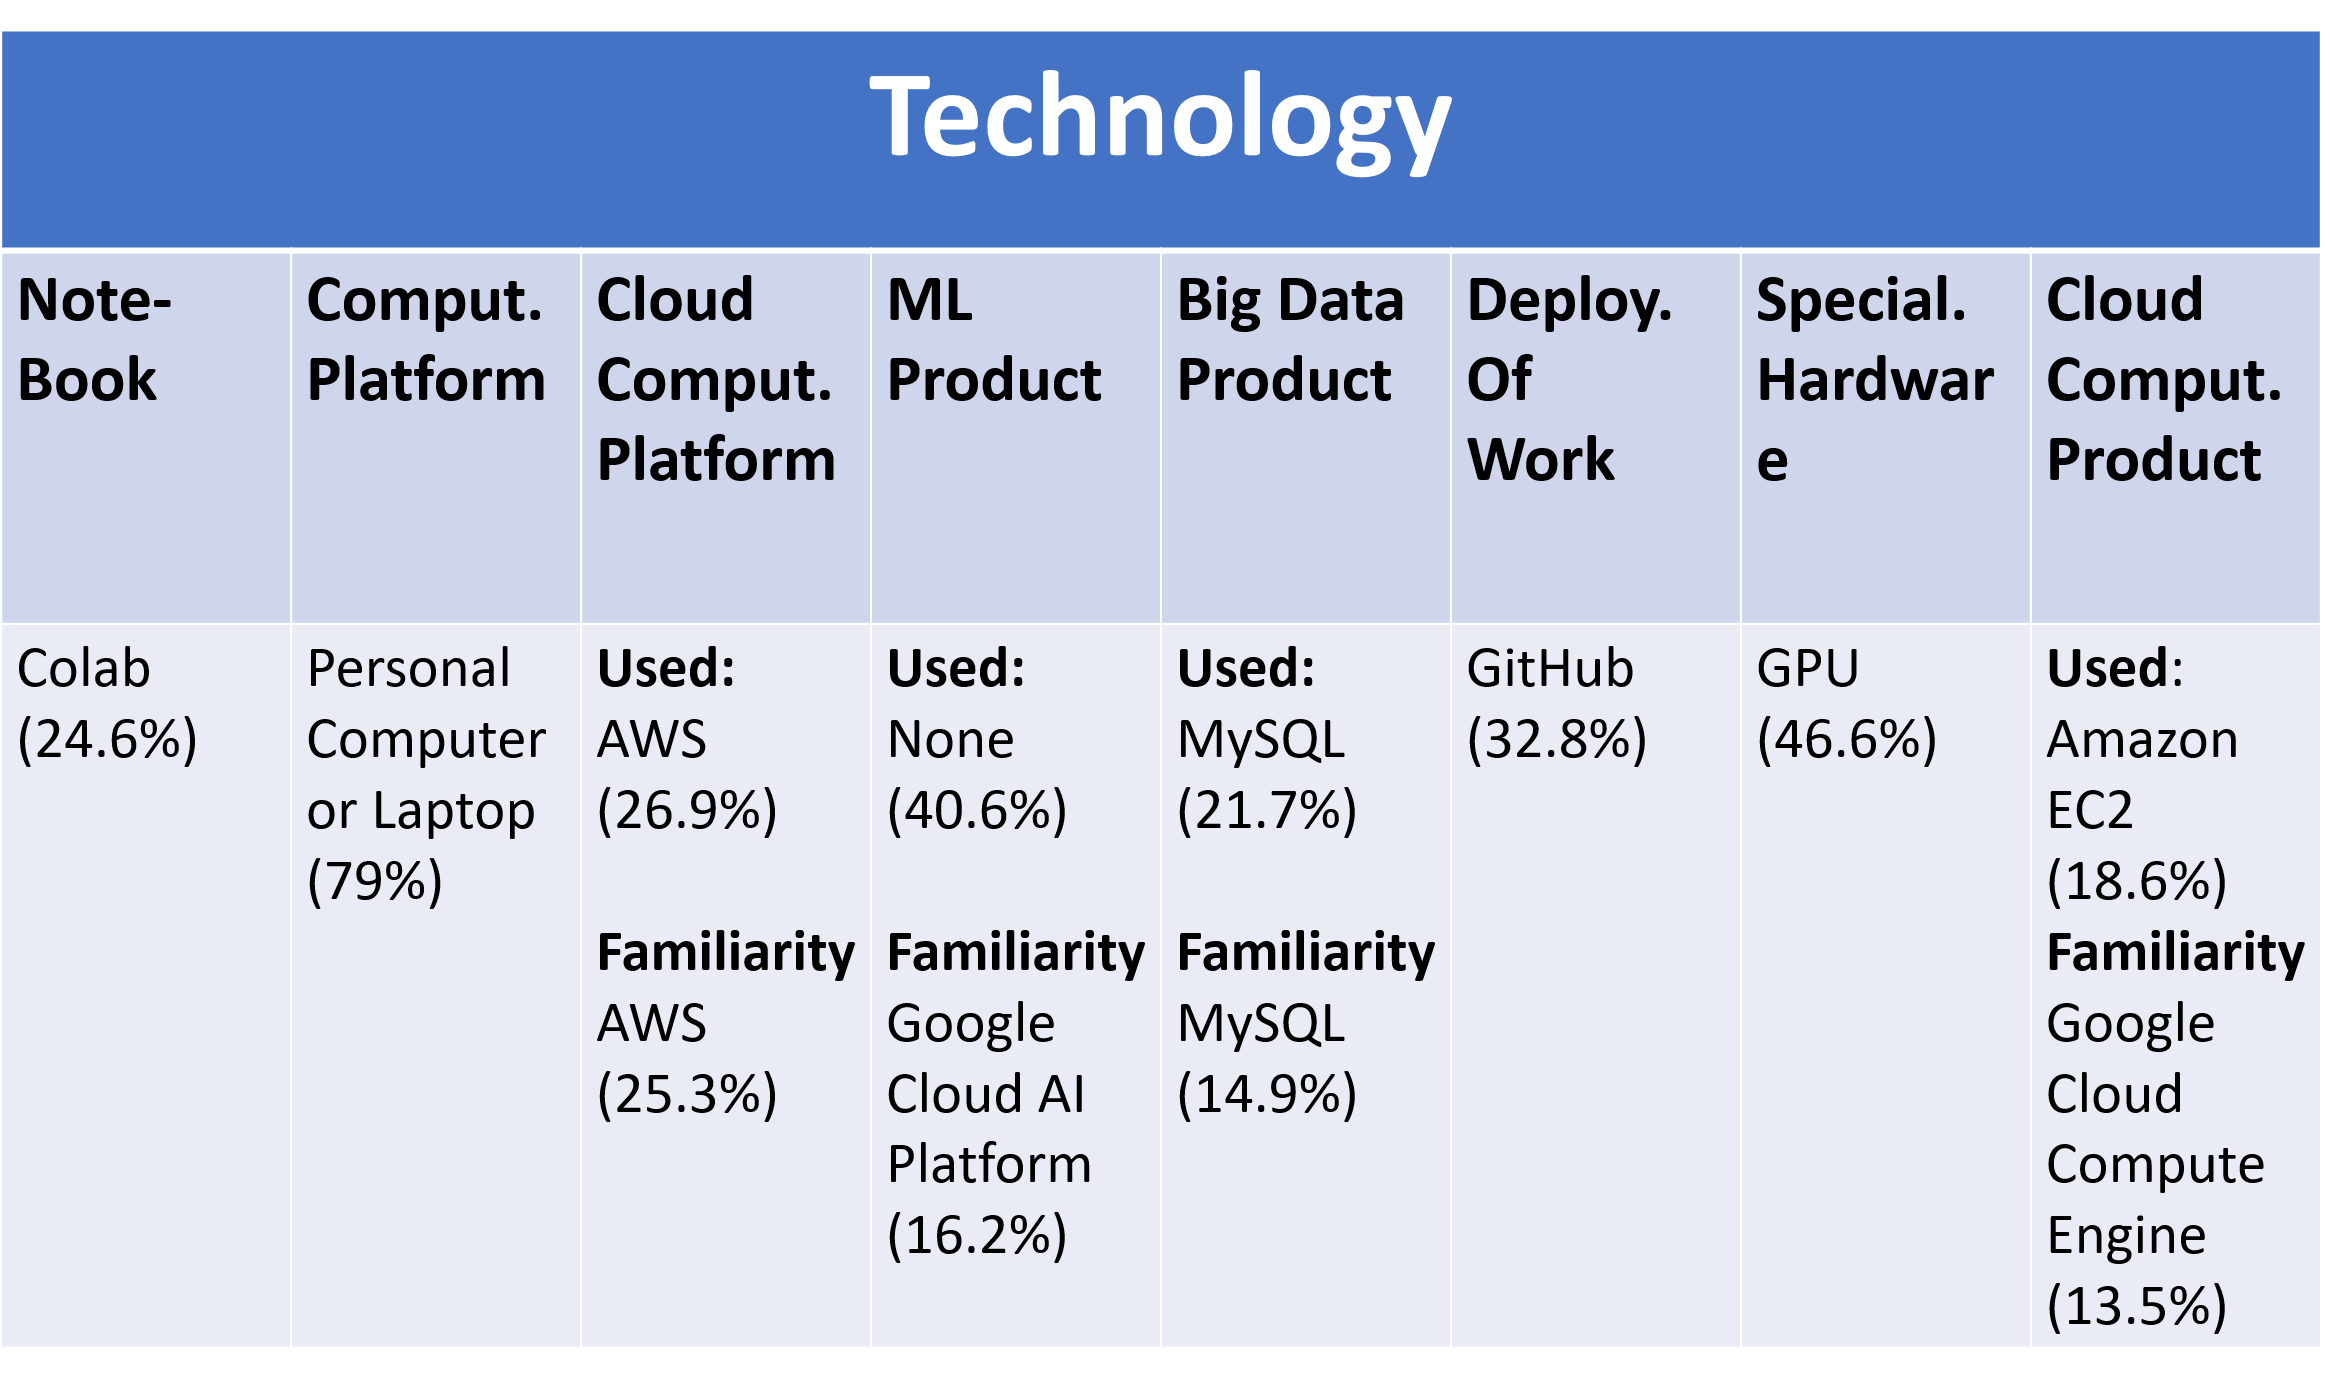


<h2 style="background-color:rgb(100, 100, 100);color:white; text-align: center">Frameworks, Algorithms & Methods</h2>

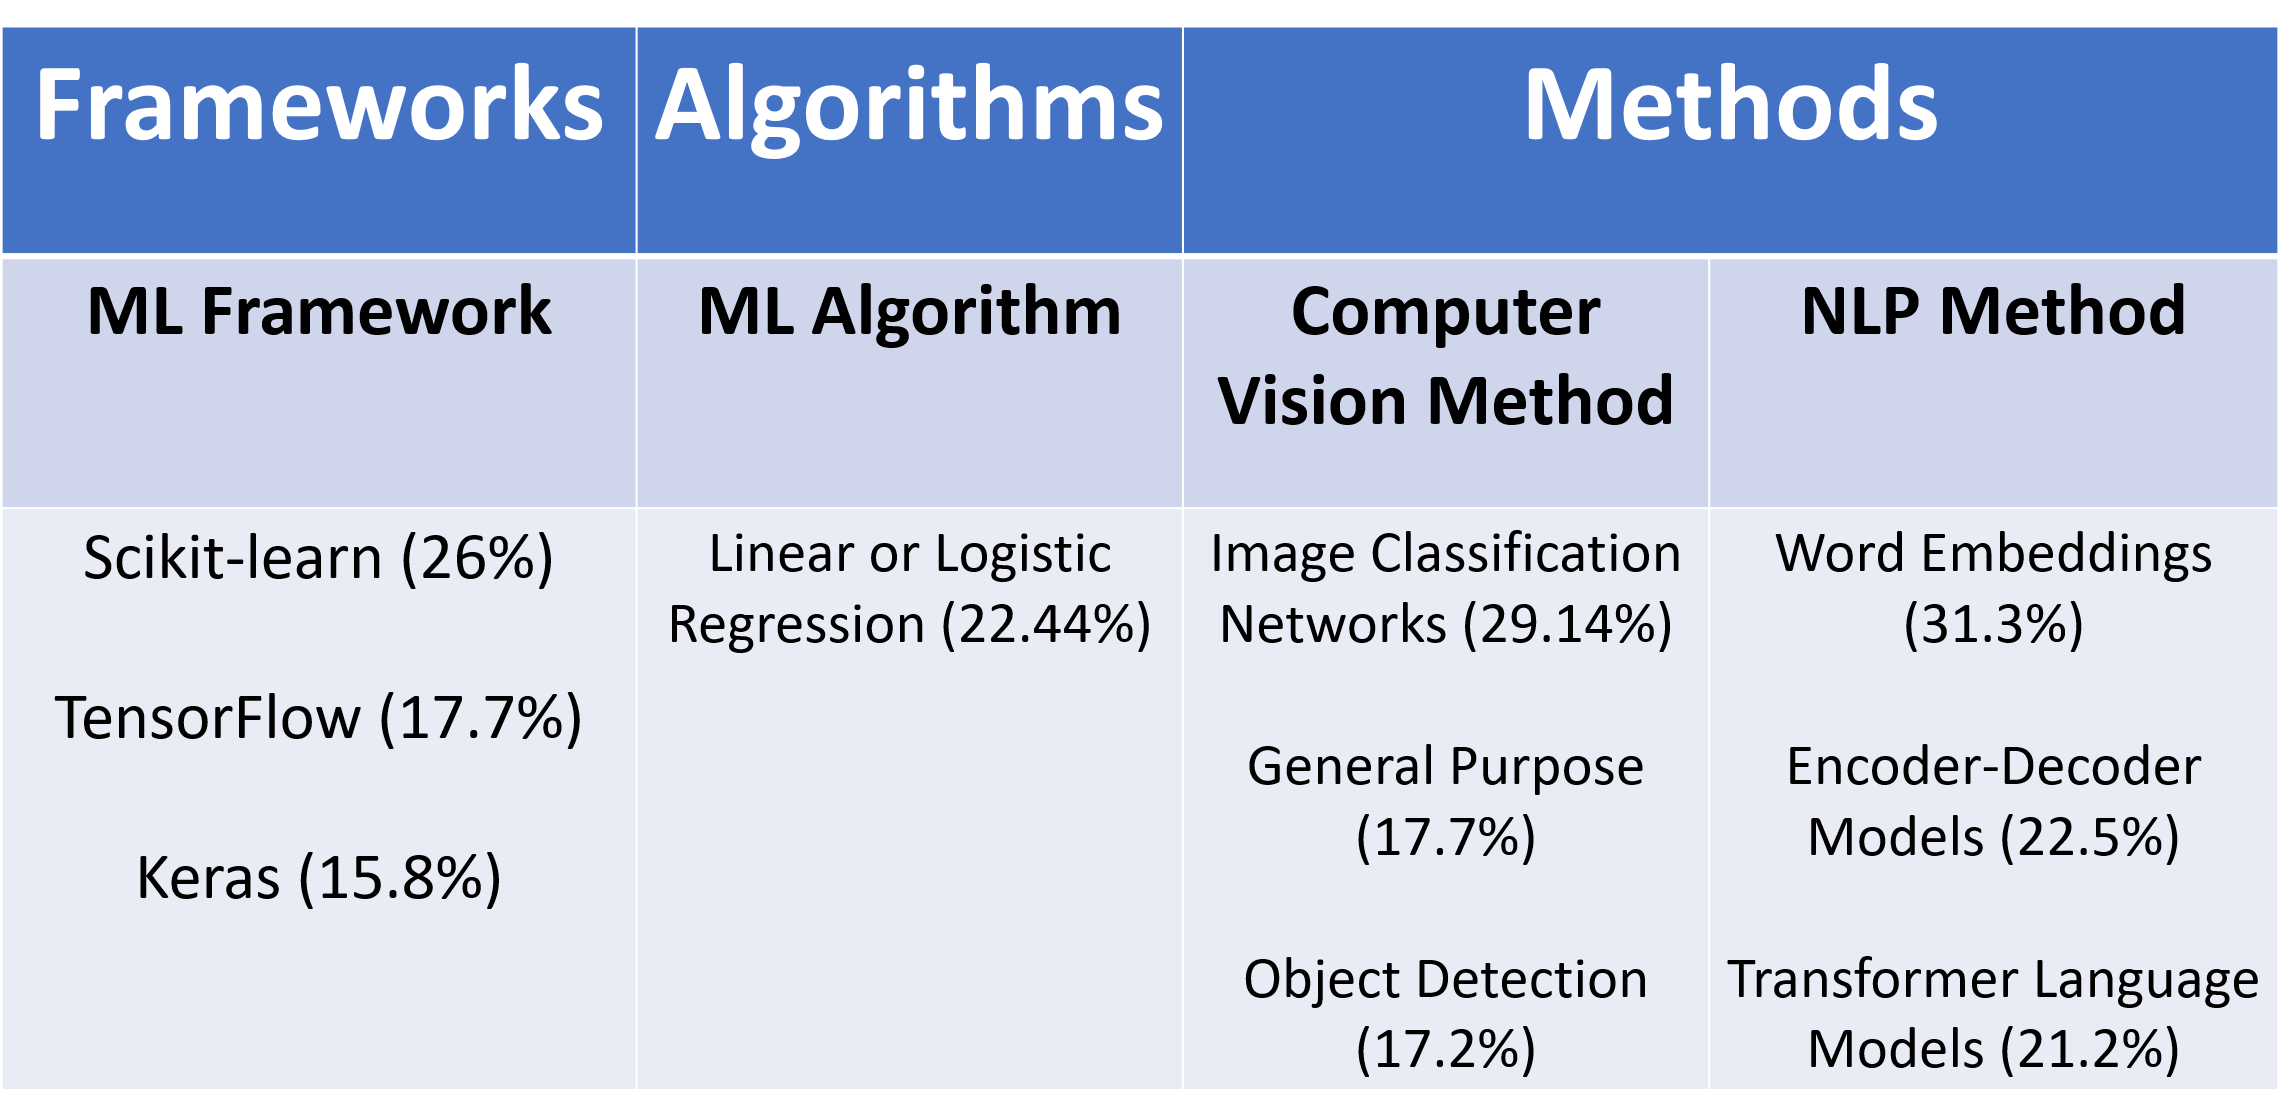

<h2 style="background-color:rgb(100, 100, 100);color:white; text-align: center">Company & Employment</h2>

### Size, No. of people, Compensation, ML Incorporation & Important Activity:

1. Among employed people, **36.9%** people works at **0-49 employees** sized company.
2. In surveyed people, Around **46%** people are from those companies who has **"1-2" (23.4%)** or **"0" (20.3%)** people responsible for Data Science work.
3. In terms of incorporating Machine Learning in company, around **40%** people are from those companies where **either they do not use ML (20%) or they are exploring ML methods (21%)**.
4. **"Analyzing and Understanding Data for Product & Business Decisions" (26.5%)** is most common important activity at work.
5. Man & Woman Gender Category have highest category **Student (19.9% & 6.4%)** followed by **Data Scientist (11.4% & 2.3%)** as a Related Job Title.
6. Here, it is pretty clear that **highest category of compensation** that people in survey receive is **(19.8%) 0-999$**. According to data, **"if a person is working as a Data Scientist then he/she is more likely to have higher compensation"**.
7. As value of Educational Degree of people increases, more and more people tend to work as more responsible job titles like **Data Scientist**, **ML Engineer**, **Research Scientist**.

---



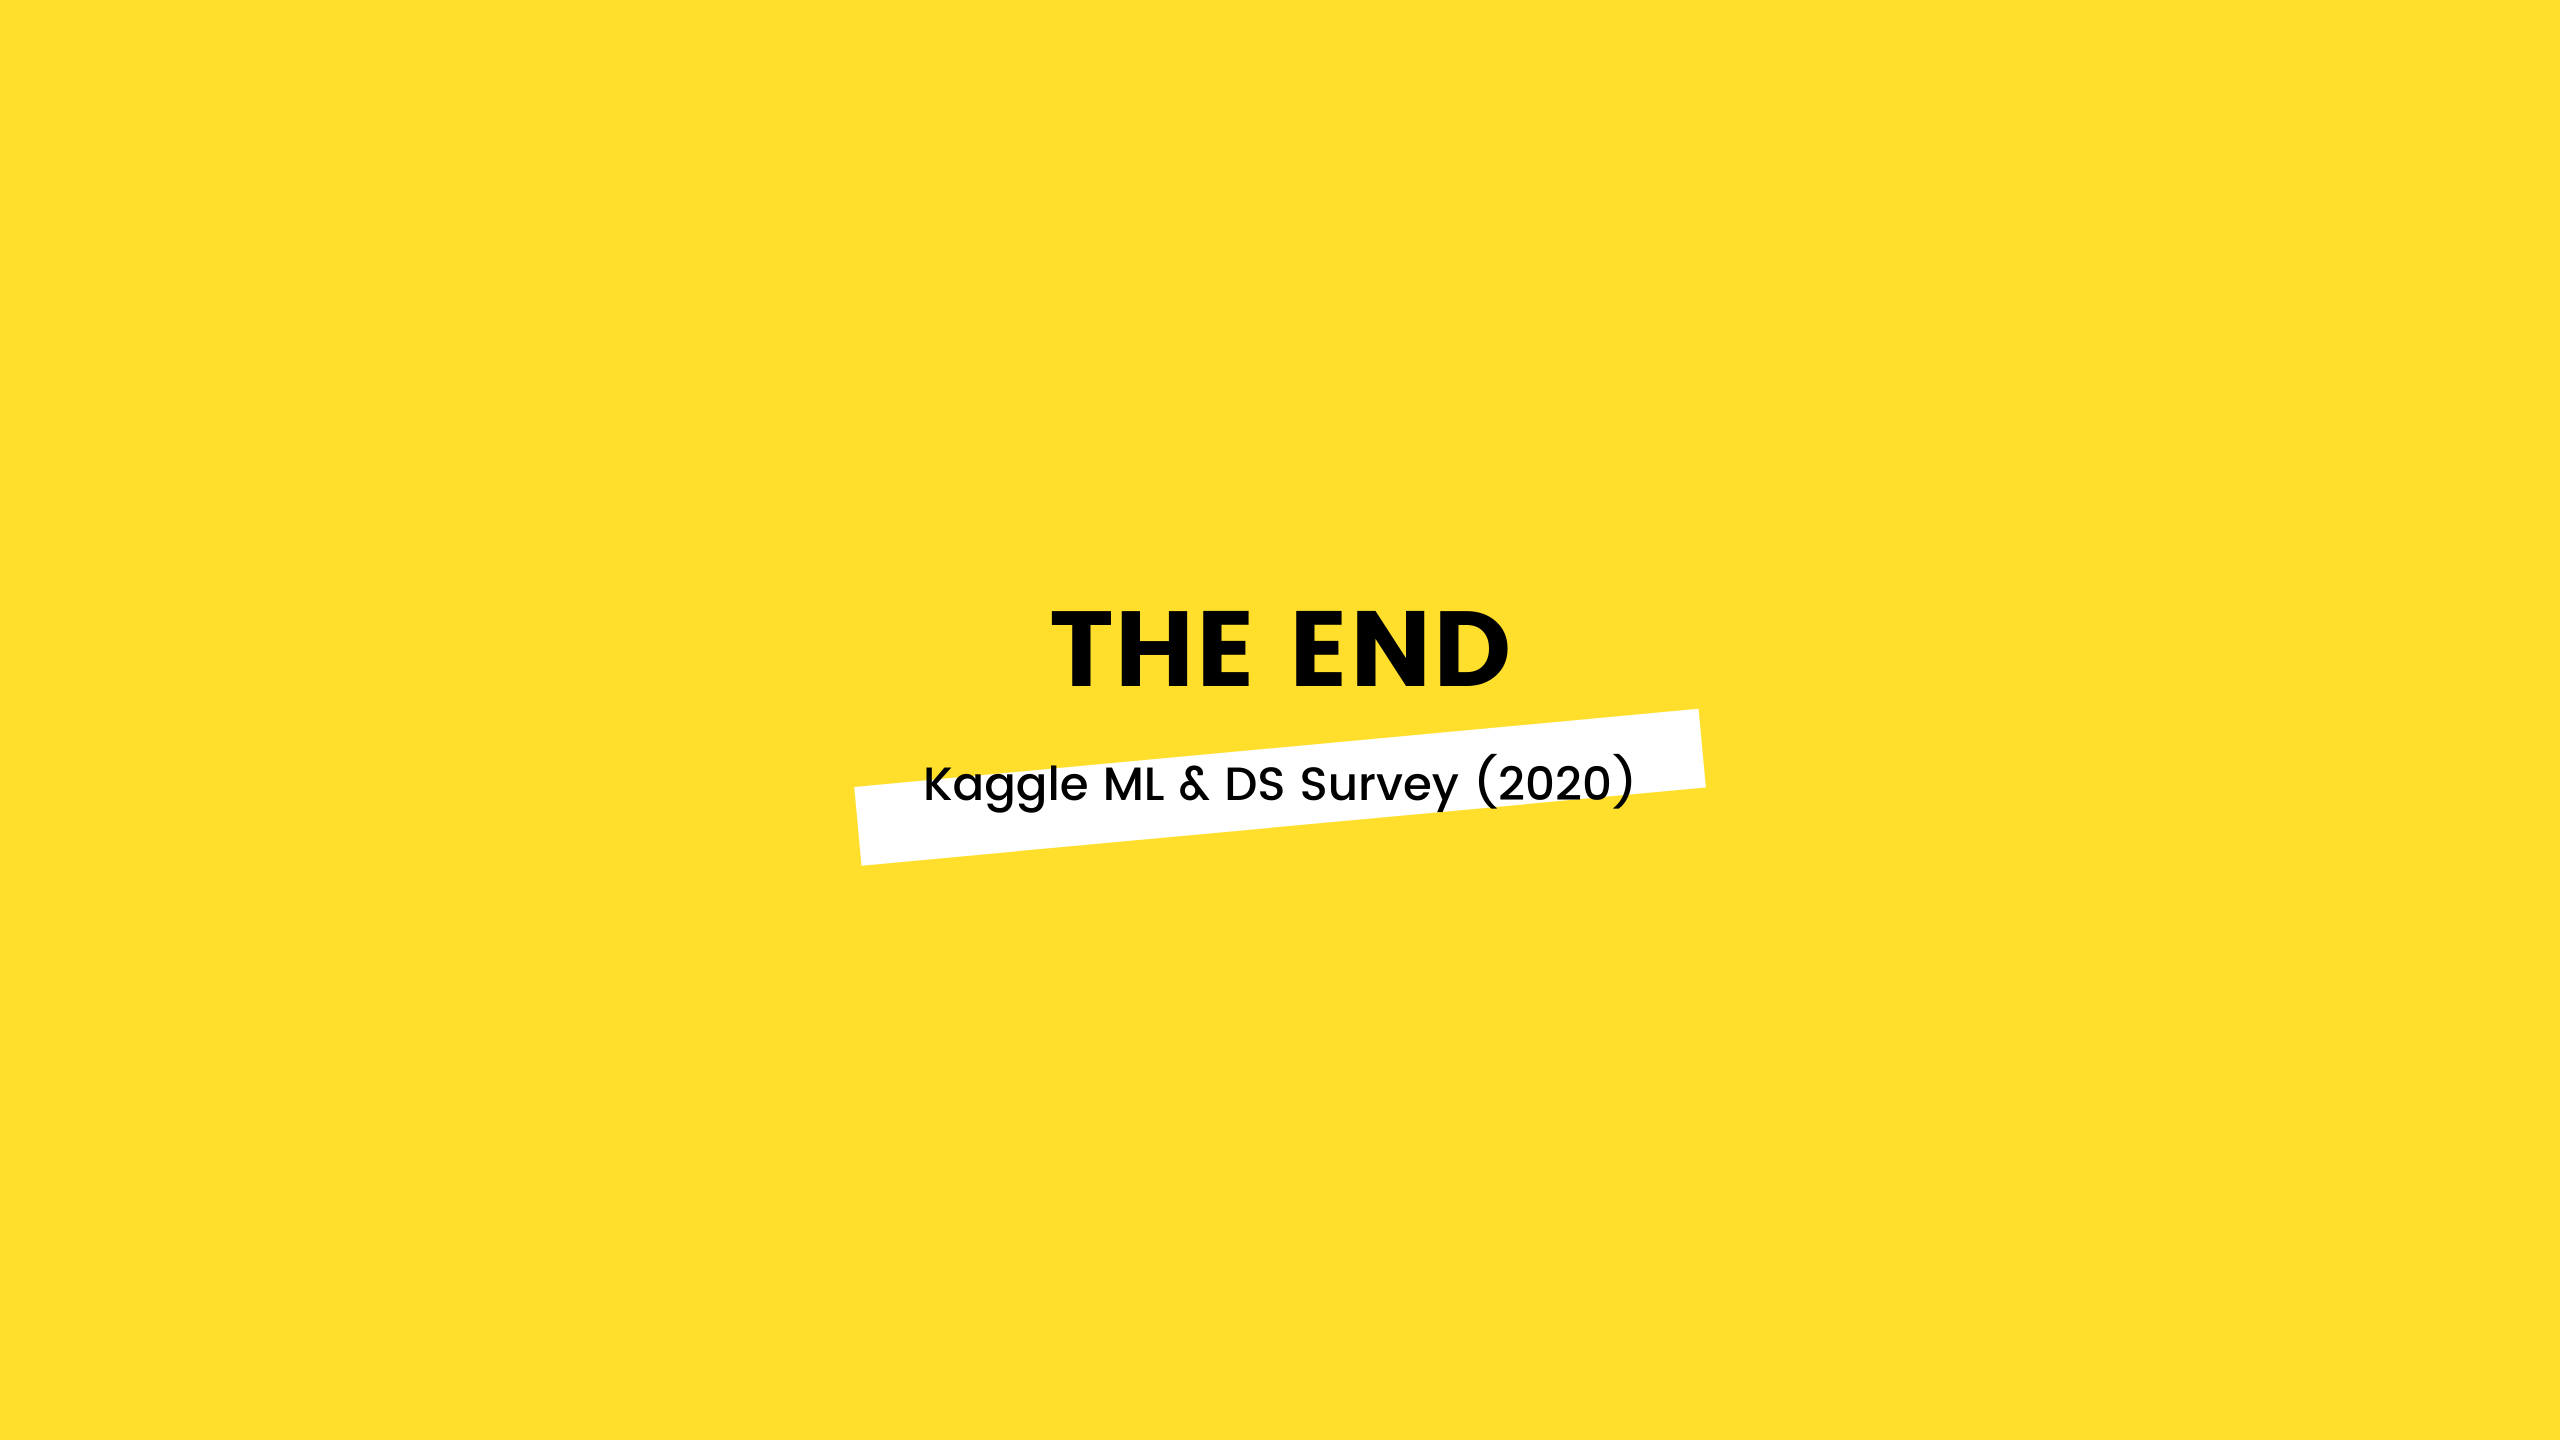